# Markov Chain from scratch

Last update: Sept 24th, 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example

Consider a worker who, at any given time $ t $, is either unemployed (state 0) or employed (state 1).

Suppose that, over a one month period,

1. An unemployed worker finds a job with probability $ \alpha \in (0, 1) $.  
1. An employed worker loses her job and becomes unemployed with probability $ \beta \in (0, 1) $.  


In terms of a Markov model, we have

- $ S = \{ 0, 1\} $  
- $ P(0, 1) = \alpha $ and $ P(1, 0) = \beta $  


We can write out the transition probabilities in matrix form as


$$
P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right)
$$

We assume $\alpha = 0.5$ and $\beta = 0.1$ as an example.

In [4]:
# An example of Markov matrix construction
alpha = 0.5
beta = 0.1


In [5]:
# Construct P
P = np.array([[1 - alpha, alpha], [beta, 1 - beta]])

In [6]:
# Or, fill in the numbers
P = np.zeros((2, 2))
P[0, 0] = 1 - alpha
P[0, 1] = alpha
P[1, 0] = beta
P[1, 1] = 1 - beta

## Chain Simulation, single agent

How do we randomly pick a state that we are going to jump into?
1. Generate a uniformly distributed random number U(0, 1)
2. Suppose we are at state 0. If this number is greater than $1-\alpha$ then we are going to jump to state 1. Otherwise, we stay at state 0.

Then we iterate forward for T times.

In [7]:
# One step iteration

cur_state = 0
cum_prob = np.cumsum(P[cur_state, :])
tmp = 0.4
next_state = np.searchsorted(cum_prob, tmp)

In [8]:
P[0, :]

array([0.5, 0.5])

In [9]:
cum_prob

array([0.5, 1. ])

In [10]:
next_state

0

In [11]:
# Iterate T times
T = 1000

ini_state = 0 # Starting from state 0 for example
res = np.zeros(T, dtype = int) # Initialize the result record
res[0] = ini_state
prob_draw = np.random.rand(T) # Draw all the probabilities in a row
for i in range(T - 1):
    cum_prob = np.cumsum(P[res[i], :])
    res[i + 1] = np.searchsorted(cum_prob, prob_draw[i])


In [12]:
# Wrap into a function

def Markov_simulation_single(P, ini_state, T):
    res = np.zeros(T, dtype = int) # Initialize the result record
    res[0] = ini_state
    prob_draw = np.random.rand(T) # Draw all the probabilities in a row
    for i in range(T - 1):
        cum_prob = np.cumsum(P[res[i], :])
        res[i + 1] = np.searchsorted(cum_prob, prob_draw[i])
        
    return res

simulation_res = Markov_simulation_single(P, 0, 1000)


In [13]:
# A bit more optimization
def Markov_simulation_single_new(P, ini_state, T):
    res = np.zeros(T, dtype = int) # Initialize the result record
    res[0] = ini_state
    prob_draw = np.random.rand(T) # Draw all the probabilities in a row
    cum_prob = np.cumsum(P, axis = 1)
    for i in range(T - 1):
        res[i + 1] = np.searchsorted(cum_prob[res[i], :], prob_draw[i])
        
    return res

simulation_res = Markov_simulation_single_new(P, 0, 1000)

## Chain simulation, distribution

The distribution is characterized by a vector. Then the simulation is just vector-matrix multiplication

In [14]:
def Markov_simulation_dist(P, ini_dist, T):
    n = len(ini_dist)
    res = np.zeros((T, n))
    res[0, :] = ini_dist
    for i in range(T - 1):
        res[i + 1, :] = res[i, :] @ P
        
    return res

In [15]:
ini_dist = np.array([0.5, 0.5])
res = Markov_simulation_dist(P, ini_dist, 100)

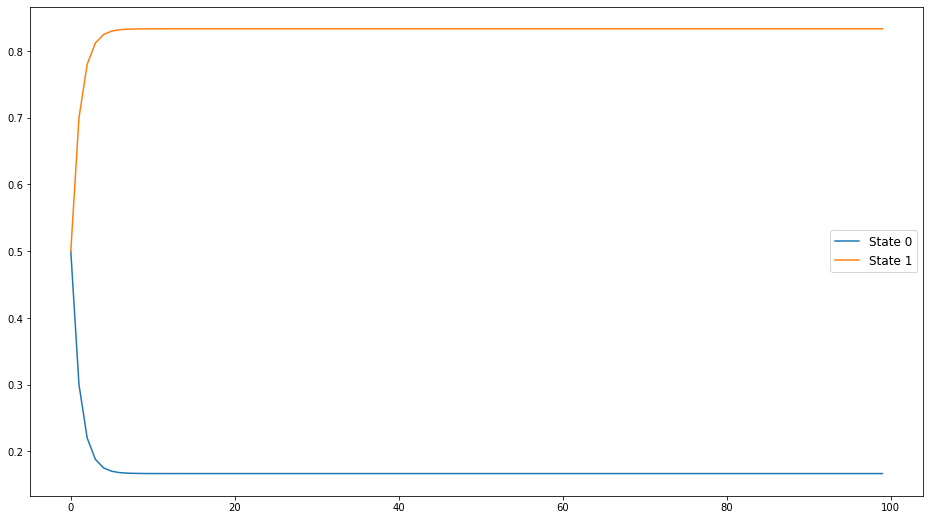

In [32]:
plt.figure(figsize = (16, 9))
plt.plot(res[:, 0], label = "State 0")
plt.plot(res[:, 1], label = "State 1")
plt.legend(loc = "best", fontsize = "large")
plt.show()

## Irreducibility Check

To check whether a Markov matrix is irreducible, we check whether $Q = (I + Z)^{n-1}$ has all positive elements where $n$ is the number of the states and $Z$ is a zero-pattern matrix of $P$.

In [53]:
# Irreducible or not?
n = np.shape(P)
Z = P > 0
Q = np.identity(n[0])
for i in range(n[0] - 1):
    Q = Q @ (np.identity(n[0]) + Z)

np.all(Q > 0)

True

## Compute Stationary Distribution

In [66]:
n = np.shape(P)
w, v = np.linalg.eig(P.T)

In [67]:
w

array([0.4, 1. ])

In [68]:
v

array([[-0.70710678, -0.19611614],
       [ 0.70710678, -0.98058068]])

In [77]:
tmp = v[:, np.isclose(w, 1)][:, 0]
sta_dist = tmp / np.sum(tmp)

In [81]:
sta_dist

array([0.16666667, 0.83333333])